In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt

In [2]:
dataset_path = r'C:\Users\Patoju Karthikeya\OneDrive\Desktop\Indian Food Images\Indian Food Images'

In [3]:
calorie_mapping = {
    'biryani': 290,
    'poha': 130,
    'rabri': 70,
 
}

In [4]:
def load_images(dataset_path, image_size=(224, 224)):
    images = []
    labels = []
    
    for label, category in enumerate(calorie_mapping.keys()):
        category_path = os.path.join(dataset_path, category)
        
        if not os.path.exists(category_path):
            print(f"Warning: Category path {category_path} does not exist.")
            continue
        
        for file in os.listdir(category_path):
            if file.endswith('.jpg') or file.endswith('.png'):
                file_path = os.path.join(category_path, file)
                try:
                    image = load_img(file_path, target_size=image_size)
                    image_array = img_to_array(image)
                    images.append(image_array)
                    labels.append(label)
                except Exception as e:
                    print(f"Failed to process file {file_path}: {e}")
    
    return np.array(images), np.array(labels)



In [5]:
X, y = load_images(dataset_path)
X = X / 255.0

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
local_weights_path = r'C:\Users\Patoju Karthikeya\OneDrive\Desktop\vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'


In [10]:
base_model = VGG16(weights=None, include_top=False, input_shape=(224, 224, 3))

In [12]:
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(calorie_mapping), activation='softmax')(x)

In [13]:
model = Model(inputs=base_model.input, outputs=predictions)


In [14]:
for layer in base_model.layers:
    layer.trainable = False


In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [16]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.3521 - loss: 1.1033 - val_accuracy: 0.3667 - val_loss: 1.0978
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 5s/step - accuracy: 0.4198 - loss: 1.0833 - val_accuracy: 0.4667 - val_loss: 1.0897
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.5235 - loss: 1.0797 - val_accuracy: 0.5333 - val_loss: 1.0804
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.5548 - loss: 1.0680 - val_accuracy: 0.3333 - val_loss: 1.0746
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.3925 - loss: 1.0625 - val_accuracy: 0.3000 - val_loss: 1.0732
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - accuracy: 0.4123 - loss: 1.0518 - val_accuracy: 0.4000 - val_loss: 1.0628
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.5173 - loss: 1.0397 - val_accuracy: 0.4667 - val_loss: 1.0494
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.5056 - loss: 1.0125 - val_accuracy: 0.5333 - val_loss: 1.0399
Epoch 9/

In [17]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5333 - loss: 1.0336
Accuracy: 0.53


In [18]:
def estimate_calories(image_path):
    image = load_img(image_path, target_size=(224, 224))
    image_array = img_to_array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)
    
    prediction = model.predict(image_array)
    predicted_label = np.argmax(prediction)
    predicted_food = list(calorie_mapping.keys())[predicted_label]
    estimated_calories = calorie_mapping[predicted_food]
    
    return predicted_food, estimated_calories

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


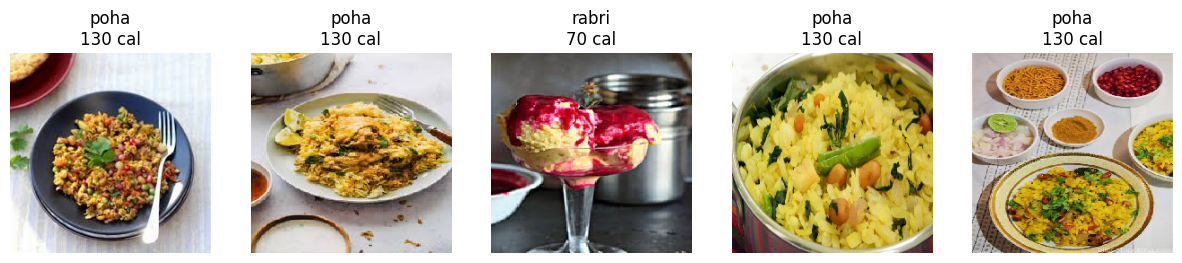

In [20]:
ig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i])
    predicted_label = np.argmax(model.predict(np.expand_dims(X_test[i], axis=0)))
    predicted_food = list(calorie_mapping.keys())[predicted_label]
    estimated_calories = calorie_mapping[predicted_food]
    ax.set_title(f"{predicted_food}\n{estimated_calories} cal")
    ax.axis('off')
plt.show()